In [1]:
import requests
import pandas as pd
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [2]:
BASE_URL = "https://planningdata.london.gov.uk/api-guest"

HEADERS = {
    "X-API-AllowRequest": "be2rmRnt&",
    "Content-Type": "application/json"
}

sources = [
    "_id",
    "_index",
    "_type",
    "actual_commencement_date",
    "actual_completion_date",
    "appeal_decision",
    "appeal_decision.raw",
    "appeal_decision_date",
    "appeal_start_date",
    "appeal_status",
    "appeal_status.raw",
    "application_details.3d_model",
    "application_details.affordable_housing_fast_track",
    "application_details.affordable_housing_inlieu_payment",
    "application_details.air_quality_assessment",
    "application_details.borough_cil_liability_notice_issued",
    "application_details.building_age",
    "application_details.building_age.raw",
    "application_details.building_details.building_ref",
    "application_details.building_details.max_height",
    "application_details.building_details.no_storeys",
    "application_details.building_type",
    "application_details.building_type.raw",
    "application_details.circular_economy_statement",
    "application_details.commencement_notice_received",
    "application_details.constraints_details.constraints_layer_description",
    "application_details.constraints_details.result",
    "application_details.existing_proposed_floorspace_details.actual_commencement_date",
    "application_details.existing_proposed_floorspace_details.actual_completion_date",
    "application_details.existing_proposed_floorspace_details.gia_existing",
    "application_details.existing_proposed_floorspace_details.gia_gained",
    "application_details.existing_proposed_floorspace_details.gia_lost",
    "application_details.existing_proposed_floorspace_details.superseded_by_lpa_app_no",
    "application_details.existing_proposed_floorspace_details.superseded_date",
    "application_details.existing_proposed_floorspace_details.use_class",
    "application_details.existing_uprns",
    "application_details.garden_land_lost",
    "application_details.green_suds",
    "application_details.grey_water_reuse",
    "application_details.householder_dev_category",
    "application_details.householder_dev_category_other",
    "application_details.infrastructure_details.chp_heat_pumps_capacity",
    "application_details.infrastructure_details.community_energy_capacity",
    "application_details.infrastructure_details.fire_suppression_system_proposed",
    "application_details.infrastructure_details.ghg_reduction_over_building_regulations",
    "application_details.infrastructure_details.green_roof_area",
    "application_details.infrastructure_details.mobile_network_operators_consultation",
    "application_details.infrastructure_details.no_active_fast_ev_charging_points",
    "application_details.infrastructure_details.no_active_other_ev_charging_points",
    "application_details.infrastructure_details.no_active_rapid_ev_charging_points",
    "application_details.infrastructure_details.no_active_slow_ev_charging_points",
    "application_details.infrastructure_details.no_homes_passive_cooling",
    "application_details.infrastructure_details.no_homes_to_have_electrical_heating",
    "application_details.infrastructure_details.no_new_gas_connections_required",
    "application_details.infrastructure_details.no_new_water_connections_required",
    "application_details.infrastructure_details.no_non_resi_units_to_have_full_fibre",
    "application_details.infrastructure_details.no_passive_fast_ev_charging_points",
    "application_details.infrastructure_details.no_passive_other_ev_charging_points",
    "application_details.infrastructure_details.no_passive_rapid_ev_charging_points",
    "application_details.infrastructure_details.no_passive_slow_ev_charging_points",
    "application_details.infrastructure_details.no_resi_units_to_have_full_fibre",
    "application_details.infrastructure_details.percentage_demolition_construction_material_recycling",
    "application_details.infrastructure_details.solar_pv_capacity",
    "application_details.infrastructure_details.total_annual_nox_emissions",
    "application_details.infrastructure_details.total_annual_pm_emissions",
    "application_details.infrastructure_details.urban_greening_factor_score",
    "application_details.infrastructure_details.waste_details.external_dry_recycling",
    "application_details.infrastructure_details.waste_details.external_food_waste",
    "application_details.infrastructure_details.waste_details.external_residual_waste",
    "application_details.infrastructure_details.waste_details.internal_dry_recycling",
    "application_details.infrastructure_details.waste_details.internal_food_waste",
    "application_details.infrastructure_details.waste_details.internal_residual_waste",
    "application_details.infrastructure_details.waste_details.reason_for_no_provision",
    "application_details.infrastructure_details.waste_details.unit_reference",
    "application_details.infrastructure_details.waste_provision",
    "application_details.intended_commencement_date",
    "application_details.intended_completion_date",
    "application_details.internal_resi_water_usage",
    "application_details.lead_developer_company_name",
    "application_details.lead_registered_social_landlord",
    "application_details.mayoral_cil_liability_notice_issued",
    "application_details.no_additional_bathrooms",
    "application_details.no_additional_bedrooms",
    "application_details.no_affordable_housing_units_acquired_offsite",
    "application_details.no_affordable_housing_units_provided_offsite",
    "application_details.non_permanent_dwellings_details.actual_commencement_date",
    "application_details.non_permanent_dwellings_details.actual_completion_date",
    "application_details.non_permanent_dwellings_details.no_gained",
    "application_details.non_permanent_dwellings_details.no_lost",
    "application_details.non_permanent_dwellings_details.superseded_by_lpa_app_no",
    "application_details.non_permanent_dwellings_details.superseded_date",
    "application_details.non_permanent_dwellings_details.type",
    "application_details.non_residential_details.development_type",
    "application_details.non_residential_details.development_type.raw",
    "application_details.non_residential_details.site_area",
    "application_details.non_residential_details.total_non_resi_gross_internal_floor_area_to_be_gained",
    "application_details.non_residential_details.total_non_resi_gross_internal_floor_area_to_be_lost",
    "application_details.occupation_status",
    "application_details.open_and_protected_space_details.open_spaces_details.access",
    "application_details.open_and_protected_space_details.open_spaces_details.actual_commencement_date",
    "application_details.open_and_protected_space_details.open_spaces_details.actual_completion_date",
    "application_details.open_and_protected_space_details.open_spaces_details.area",
    "application_details.open_and_protected_space_details.open_spaces_details.change_type",
    "application_details.open_and_protected_space_details.open_spaces_details.description",
    "application_details.open_and_protected_space_details.open_spaces_details.land_swap",
    "application_details.open_and_protected_space_details.open_spaces_details.open_space_designation",
    "application_details.open_and_protected_space_details.open_spaces_details.open_space_type",
    "application_details.open_and_protected_space_details.open_spaces_details.superseded_by_lpa_app_no",
    "application_details.open_and_protected_space_details.open_spaces_details.superseded_date",
    "application_details.open_and_protected_space_details.protected_space_count",
    "application_details.open_and_protected_space_details.protected_spaces_details.access",
    "application_details.open_and_protected_space_details.protected_spaces_details.actual_commencement_date",
    "application_details.open_and_protected_space_details.protected_spaces_details.actual_completion_date",
    "application_details.open_and_protected_space_details.protected_spaces_details.area",
    "application_details.open_and_protected_space_details.protected_spaces_details.change_type",
    "application_details.open_and_protected_space_details.protected_spaces_details.description",
    "application_details.open_and_protected_space_details.protected_spaces_details.nature_conservation_designation",
    "application_details.open_and_protected_space_details.protected_spaces_details.superseded_by_lpa_app_no",
    "application_details.open_and_protected_space_details.protected_spaces_details.superseded_date",
    "application_details.other_contributions",
    "application_details.other_residential_accommodation_details.no_council_tax_rateable_units_gained",
    "application_details.other_residential_accommodation_details.no_council_tax_rateable_units_lost",
    "application_details.other_residential_accommodation_details.other_resi_accommodation_unit_details.actual_commencement_date",
    "application_details.other_residential_accommodation_details.other_resi_accommodation_unit_details.actual_completion_date",
    "application_details.other_residential_accommodation_details.other_resi_accommodation_unit_details.m42_compliant",
    "application_details.other_residential_accommodation_details.other_resi_accommodation_unit_details.m43_2a_compliant",
    "application_details.other_residential_accommodation_details.other_resi_accommodation_unit_details.m43_2b_compliant",
    "application_details.other_residential_accommodation_details.other_resi_accommodation_unit_details.no_bedrooms_for_older_persons_c2",
    "application_details.other_residential_accommodation_details.other_resi_accommodation_unit_details.no_bedrooms_for_older_persons_sg",
    "application_details.other_residential_accommodation_details.other_resi_accommodation_unit_details.no_rooms_lost",
    "application_details.other_residential_accommodation_details.other_resi_accommodation_unit_details.no_rooms_proposed",
    "application_details.other_residential_accommodation_details.other_resi_accommodation_unit_details.superseded_by_lpa_app_no",
    "application_details.other_residential_accommodation_details.other_resi_accommodation_unit_details.superseded_date",
    "application_details.other_residential_accommodation_details.other_resi_accommodation_unit_details.unit_type",
    "application_details.other_residential_accommodation_details.site_area",
    "application_details.overseas_company_registration_no",
    "application_details.ownership_status",
    "application_details.phasing_details.intended_commencement_date",
    "application_details.phasing_details.intended_completion_date",
    "application_details.phasing_details.phase_detail",
    "application_details.projected_cost_of_works",
    "application_details.qualifying_vacant_building_floorspace",
    "application_details.rain_water_harvesting",
    "application_details.resi_extension_exempt",
    "application_details.residential_details.affordable_percentage",
    "application_details.residential_details.dwelling_density",
    "application_details.residential_details.habitable_rooms_density",
    "application_details.residential_details.residential_units.actual_commencement_date",
    "application_details.residential_details.residential_units.actual_completion_date",
    "application_details.residential_details.residential_units.change_type",
    "application_details.residential_details.residential_units.description",
    "application_details.residential_details.residential_units.garden_land",
    "application_details.residential_details.residential_units.gia",
    "application_details.residential_details.residential_units.m42_compliant",
    "application_details.residential_details.residential_units.m43_2a_compliant",
    "application_details.residential_details.residential_units.m43_2b_compliant",
    "application_details.residential_details.residential_units.no_bedrooms",
    "application_details.residential_details.residential_units.no_habitable_rooms",
    "application_details.residential_details.residential_units.phase_detail",
    "application_details.residential_details.residential_units.provider",
    "application_details.residential_details.residential_units.provision_for_older_persons",
    "application_details.residential_details.residential_units.sheltered_accommodation",
    "application_details.residential_details.residential_units.superseded_by_lpa_app_no",
    "application_details.residential_details.residential_units.superseded_date",
    "application_details.residential_details.residential_units.tenure",
    "application_details.residential_details.residential_units.tenure.raw",
    "application_details.residential_details.residential_units.unit_development_type",
    "application_details.residential_details.residential_units.unit_development_type.raw",
    "application_details.residential_details.residential_units.unit_no",
    "application_details.residential_details.residential_units.unit_type",
    "application_details.residential_details.residential_units.uprn",
    "application_details.residential_details.site_area",
    "application_details.residential_details.total_gia_gained",
    "application_details.residential_details.total_gia_lost",
    "application_details.s106_agreement",
    "application_details.scheme_name",
    "application_details.scheme_phasing",
    "application_details.site_area",
    "application_details.social_infrastructure_contributions",
    "application_details.superseding_details.component_description",
    "application_details.superseding_details.lpa_app_no",
    "application_details.superseding_details.lpa_name",
    "application_details.superseding_details.lpa_name.raw",
    "application_details.superseding_details.partial_supersedence",
    "application_details.superseding_details.unit_reference",
    "application_details.surface_water_discharge_percentage_reduction",
    "application_details.total_gia_existing",
    "application_details.total_gia_gained",
    "application_details.total_gia_lost",
    "application_details.transport_contributions",
    "application_details.transport_impact_assessment",
    "application_details.uk_company_registration_no",
    "application_details.viability_assessment",
    "application_type",
    "application_type.raw",
    "application_type_full",
    "application_type_full.raw",
    "bo_system",
    "bo_system.raw",
    "borough",
    "borough.raw",
    "centroid",
    "centroid_easting",
    "centroid_northing",
    "cil_liability",
    "date_building_work_completed_under_previous_permission",
    "date_building_work_started_under_previous_permission",
    "decision",
    "decision.raw",
    "decision_agency",
    "decision_conditions",
    "decision_conditions.raw",
    "decision_date",
    "decision_process",
    "decision_target_date",
    "description",
    "development_type",
    "epc_number",
    "id",
    "lapsed_date",
    "last_date_consultation_comments",
    "last_synced",
    "last_updated\u00a0",
    "last_updated_by",
    "last_updated_by.raw",
    "locality",
    "lpa_app_no",
    "lpa_name",
    "lpa_name.raw",
    "parking_details.net_bluebadge",
    "parking_details.net_bus",
    "parking_details.net_car",
    "parking_details.net_carclub",
    "parking_details.net_cycle",
    "parking_details.net_lgv",
    "parking_details.net_motorcycle",
    "parking_details.net_other",
    "parking_details.net_resi_offstreet",
    "parking_details.no_existing_bluebadge",
    "parking_details.no_existing_bus",
    "parking_details.no_existing_car",
    "parking_details.no_existing_carclub",
    "parking_details.no_existing_cycle",
    "parking_details.no_existing_lgv",
    "parking_details.no_existing_motorcycle",
    "parking_details.no_existing_other",
    "parking_details.no_existing_resi_offstreet",
    "parking_details.no_proposed_bluebadge",
    "parking_details.no_proposed_bus",
    "parking_details.no_proposed_car",
    "parking_details.no_proposed_carclub",
    "parking_details.no_proposed_cycle",
    "parking_details.no_proposed_lgv",
    "parking_details.no_proposed_motorcycle",
    "parking_details.no_proposed_other",
    "parking_details.no_proposed_resi_offstreet",
    "polygon",
    "postcode",
    "pp_id",
    "pp_retry_expiry",
    "pp_update_required",
    "reference_no_of_permission_being_relied_on",
    "secondary_street_name",
    "site_name",
    "site_number",
    "status",
    "status.raw",
    "street_name",
    "subdivision_of_building",
    "title_number",
    "uprn",
    "url_planning_app",
    "valid_date",
    "ward",
    "wgs84_polygon"
]

In [4]:
def search_applications(date, size=10000):
    """Fetch applications from API for a specific date."""
    url = f"{BASE_URL}/applications/_search"
    query = {
        "query": {
            "bool": {
                "must": [
                    {"range": {"valid_date": {"gte": date, "lte": date}}},
                ]
            }
        },
        "_source": sources,
        "size": size
    }
    
    response = requests.post(url, json=query, headers=HEADERS)
    
    if response.status_code == 200:
        results = response.json().get('hits', {}).get('hits', [])
        if len(results) == 10000:
            print('Size limit hit')
        return results
    else:
        print(f"Error {response.status_code} for {date}: {response.text}")
        return []

In [ ]:
day_from = 1
day_to = 31
month_from = 1
month_to = 12
year_from = 2023
year_to = 2024

total_iterations = (day_to - day_from + 1) * (month_to - month_from + 1) * (year_to - year_from + 1)
all_results = []

with tqdm(total=total_iterations, desc="Fetching Applications") as pbar:
    for year in range(year_from, year_to+1):
        for month in range(month_from, month_to+1):
            for day in range(day_from, day_to+1):
                try:
                    date = f"{day:02d}/{month:02d}/{year}"
                    # print(f"Fetching data for: {date}")
                    results = search_applications(date)
                    if results:
                        all_results.extend(results)
                except Exception as e:
                    print(f"Skipping {date}: {e}")
                pbar.update(1)

In [ ]:
with open("2024.json", "w") as f:
    json.dump(all_results, f, indent=4)

In [ ]:
all_results_df = pd.read_json('2024.json')
all_results_df.shape

(223190, 6)

In [ ]:
def recursively_flatten_df(df):
    """
    Recursively flattens a DataFrame by:
    1. Expanding nested dictionaries into columns.
    2. Keeping lists unchanged (no exploding).
    3. Recursively processing newly expanded columns.

    Parameters:
    - df: Pandas DataFrame with potential nested dictionaries.

    Returns:
    - Flattened Pandas DataFrame.
    """
    while True:
        # Identify columns with dictionaries
        dict_columns = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, dict)).any()]
        
        # If no more nested structures, stop
        if not dict_columns:
            break
        
        # Flatten dictionary columns
        for col in dict_columns:
            expanded_df = df[col].apply(pd.Series)  # Convert dict to multiple columns
            expanded_df = expanded_df.add_prefix(f"{col}_")  # Prefix with original column name
            df = df.drop(columns=[col]).join(expanded_df)  # Drop old col and join new ones

    return df.reset_index(drop=True)  # Reset index after transformations

In [ ]:
df_flattened = recursively_flatten_df(all_results_df)
df_flattened.shape

(223190, 193)

In [10]:
# Save to CSV (optional)
df_flattened.to_csv("2024_flattened.csv", index=False)

In [3]:
df_flattened = pd.read_csv("2024_flattened.csv")

/var/folders/6m/wr61k3214hb79513yn3t23r80000gn/T/ipykernel_22740/744312605.py:1: DtypeWarning: Columns (25,27,41,44,55,82,84,88,90,94,95,100,105,108,109,110,140,144,190,192) have mixed types. Specify dtype option on import or set low_memory=False.
  df_flattened = pd.read_csv("2024_flattened.csv")


In [4]:
# Rename columns
df_flattened.columns = df_flattened.columns.str.replace(r"^_source_", "", regex=True)

In [5]:
# Convert list-type values to strings for counting unique values
df_cleaned = df_flattened.map(lambda x: str(x) if isinstance(x, list) else x)

# Drop columns where all values are the same (including single unique values + NaNs)
df_flattened = df_cleaned.loc[:, df_cleaned.nunique(dropna=True) > 1]

df_flattened.shape

(223190, 161)

In [6]:
# Only keep refused or approved applications
df_flattened = df_flattened[(df_flattened.status == 'Refused') | (df_flattened.status == 'Approved')]
df_flattened.shape

(153399, 161)

In [7]:
df_flattened.dtypes.value_counts()

object     87
float64    74
Name: count, dtype: int64

In [ ]:
# def convert_date_columns(df):
#     """
#     Detects and converts date columns in a DataFrame.
    
#     - Converts dd/mm/yyyy and timestamp formats to pandas datetime.
#     - Handles NaN values safely.
#     - Standardizes all timestamps.
    
#     Returns:
#     - DataFrame with converted date columns.
#     """

#     successes = []
#     failures = []

#     for col in df.columns:
#         if df[col].dtype == "object":  # Only check string-like columns
#             try:
#                 df[col] = pd.to_datetime(df[col], dayfirst=True)  # Auto-detects format
#                 successes.append(col)
#             except Exception:
#                 failures.append(col)
#                 # pass  # Skip if conversion fails
#                 # print(f"Fail for {col}")

#     return df, successes, failures

# df_flattened, s, f = convert_date_columns(df_flattened)
# df_flattened.dtypes.value_counts()

In [8]:
# Convert object columns to categorical

categorical_columns = df_flattened.select_dtypes(include=["object"]).columns.tolist()

for col in categorical_columns:
    df_flattened[col] = df_flattened[col].apply(lambda x: str(x) if isinstance(x, list) else x)

df_flattened[categorical_columns] = df_flattened[categorical_columns].astype("category")
df_flattened.dtypes.value_counts()

float64     74
category    13
category     2
category     1
category     1
            ..
category     1
category     1
category     1
category     1
category     1
Name: count, Length: 75, dtype: int64

In [9]:
# Map statuses to binaries
df_flattened['status'] = df_flattened['status'].map({'Approved':1, 'Refused':0})

In [10]:
# Check nulls
df_flattened.isnull().sum().sum()

np.int64(18367376)

In [11]:
# Select columns and create X and Y
target_column = "status"
columns_to_drop = ["decision","decision_conditions","appeal_decision"]
columns_to_drop.append(target_column)

X = df_flattened.drop(columns=columns_to_drop)
y = df_flattened[target_column]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Train and test model
model = XGBClassifier(enable_categorical=True, eval_metric="logloss", random_state=42)

eval_set = [(X_train, y_train), (X_valid, y_valid)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

y_pred = model.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.8656


,Feature,Importance
150,application_details_residential_details_dwelling_density,0.116799
24,appeal_decision_date,0.052238
37,lapsed_date,0.049368
7,borough,0.047591
31,street_name,0.040460
19,postcode,0.037090
36,last_synced,0.030480
15,uprn,0.029112
29,ward,0.028583
28,description,0.026949


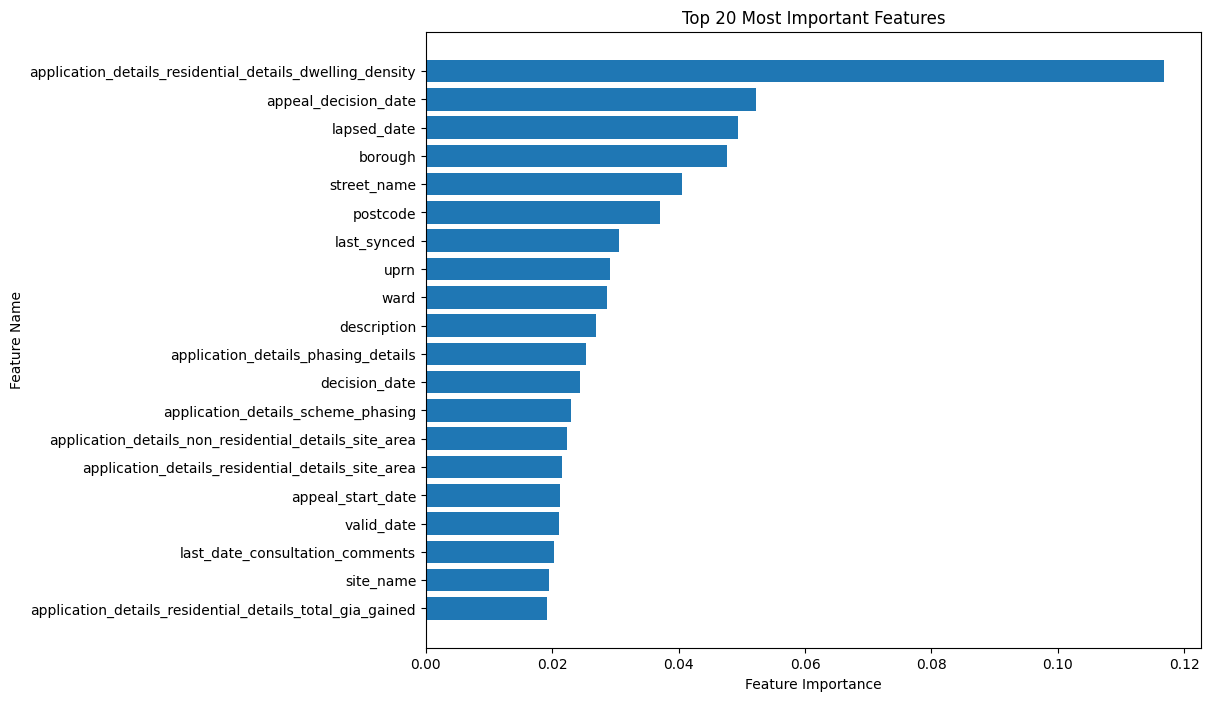

In [13]:
# Check which parts of the application matter most
feature_importance = model.feature_importances_

n = 20

importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

with pd.option_context('display.max_colwidth',None):
    display(importance_df.head(n))

plt.figure(figsize=(10, 8))
plt.barh(importance_df["Feature"][:n], importance_df["Importance"][:n])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title(f"Top {n} Most Important Features")
plt.gca().invert_yaxis()
plt.show()

In [21]:
col = 'application_details_residential_details_dwelling_density'

In [22]:
pd.DataFrame(df_flattened[['status',col]].value_counts()).reset_index().pivot_table(index='status',columns=col)

/var/folders/6m/wr61k3214hb79513yn3t23r80000gn/T/ipykernel_22740/184910207.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.DataFrame(df_flattened[['status',col]].value_counts()).reset_index().pivot_table(index='status',columns=col)


count  \
application_details_residential_details_dwelling_density 0.000000     
status                                                                
1                                                            8530.0   
0                                                            3272.0   

                                                                     \
application_details_residential_details_dwelling_density 0.001000     
status                                                                
1                                                               1.0   
0                                                               NaN   

                                                                     \
application_details_residential_details_dwelling_density 0.003000     
status                                                                
1                                                               1.0   
0                                                               NaN   

                                                                     \
application_details_residential_details_dwelling_density 0.003067     
status                                                                
1                                                               1.0   
0                                                               NaN   

                                                                     \
application_details_residential_details_dwelling_density 0.004926     
status                                                                
1                                                               1.0   
0                                                               NaN   

                                                                     \
application_details_residential_details_dwelling_density 0.005000     
status                                                                
1                                                               1.0   
0                                                               NaN   

                                                                     \
application_details_residential_details_dwelling_density 0.005236     
status                                                                
1                                                               1.0   
0                                                               NaN   

                                                                     \
application_details_residential_details_dwelling_density 0.006098     
status                                                                
1                                                               1.0   
0                                                               NaN   

                                                                     \
application_details_residential_details_dwelling_density 0.006494     
status                                                                
1                                                               1.0   
0                                                               NaN   

                                                                     ...  \
application_details_residential_details_dwelling_density 0.006498    ...   
status                                                               ...   
1                                                               NaN  ...   
0                                                               1.0  ...   

                                                                     \
application_details_residential_details_dwelling_density 283.018868   
status                                                                
1                                                               2.0   
0                                                               NaN   

                                                                     \
application_details_residential_details_dwelling_d

In [20]:
watery = df_flattened[df_flattened.application_details_infrastructure_details_no_new_water_connections_required == 552].iloc[0]

print(watery.description)
print()
print(watery.application_type_full)
print()
print(watery.decision_conditions)
print()
print(watery.decision)
# with pd.option_context('display.max_rows',None):
    # display(watery)

Redevelopment of the site comprising the erection of two buildings comprising residential (Use Class C3), flexible commercial (Use Class E) and ancillary residential floorspace (Use Class C3), basement, disabled persons' car parking, cycle parking, new public realm, landscaping and play space, plant, refuse and associated works

Full planning permission

nan

Approved


In [19]:
big = df_flattened[df_flattened.application_details_residential_details_total_gia_gained == 36247.20].iloc[0]

print(big.description)
print()
print(big.application_type_full)
print()
print(big.decision_conditions)
print()
print(big.decision)
# with pd.option_context('display.max_rows',None):
    # display(big)

Reserved Matters Application relating to the approval of access; appearance; landscaping; layout and scale in respect of Phases 4b, 4c and 4d (Development Plots H1 and H2); for the erection of two buildings comprising residential and non-residential floorspace with associated landscaping in compliance with Condition 1 (Reserved Matters Details), Condition 4 (Outline Component Drawings) and Condition 5 (Design Codes, Development Specification and Parameter Plans); of planning permission (ref: 2018/02100/COMB) dated 8 February 2019 (as amended by ref: 2024/00961/VAR dated 3 December 2024) (a comprehensive residential led mixed use redevelopment of the former Gasworks Site).

Approval of reserved matters

['Justification', 'Time', 'Fire Strategy', 'Drawings']

Approved


In [23]:
display(pd.DataFrame(df_flattened[['status','borough']].value_counts()).pivot_table(index='borough', columns='status', aggfunc='sum', fill_value=0, observed=False))
df_flattened_2 = df_flattened[['status','borough']].copy()
df_flattened_2['status'] = df_flattened_2['status'].astype(int)
display(df_flattened_2[['status','borough']].groupby('borough', observed=True).mean().sort_values('status'))

count      
status                                        1     0
borough                                              
Barking & Dagenham                            7     2
Barking and Dagenham                          2     0
Barnet                                        0     2
Brent                                      4379  1405
Bromley                                      20     0
Bromley Custodian Code                     5095  1208
Camden                                     3688   190
City of London                             1780     9
Custodian code                              199    61
Ealing                                     5362   979
Enfield                                       1     0
Enfield Council                            3982  1226
Greenwich                                  3931     0
Hackney                                    1930   472
Haringey                                    501    74
Harrow                                     1807   628
Havering                                   2536   909
Hillingdon                                 4990   203
Hounslow                                   6768  1732
Islington                                   788    84
Kensington & Chelsea                       7131   568
LLDC                                          4     1
Lambeth                                       9     0
Lewisham                                   3837   863
London Borough of Barking and Dagenham      690   360
London Borough of Barnet                   7880  1235
London Borough of Bexley                   2981   504
London Borough of Croydon                  5029  1568
London Borough of Hammersmith and Fulham   2987   174
London Borough of Lambeth                  4746  1040
London Borough of Newham                   3237   566
London Borough of Southwark                5140   336
London Borough of Sutton                   2352   550
Merton                                     2676   607
Out of Borough                             1530   215
Redbridge                                   595   149
Richmond upon Thames                       4823   889
Royal Borough of Kingston (LA Code)        3013  1246
Tower Hamlets                              2451   322
Waltham Forest                             3556  1380
Wandsworth                                 6836   577
Westminster                               10668  1128

,status
borough,
Barnet,0.000000
London Borough of Barking and Dagenham,0.657143
Royal Borough of Kingston (LA Code),0.707443
Waltham Forest,0.720421
Havering,0.736139
Harrow,0.742094
Brent,0.757089
London Borough of Croydon,0.762316
Enfield Council,0.764593
